In [1]:
# Michigan Hackers Machine Learning Team
# Project: Simple Linear Regression of Sat/Gpa
# Description: Find linear relationship between years of experience and salary
# Author: Adam Gunn
# Date: 10/14/20

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def poly_dim(X, power = 1):
    Phi = np.array([[x ** p for p in  range(power + 1)] for x in X])
    return Phi

In [4]:
def MSE(X, theta, Y):
    return np.sum(Y - np.dot(X, theta)) ** 2 / len(X)

In [5]:
def GD(X,Y,L,epochs):
    theta = np.zeros(X.shape[1])
    n = len(X)
    for i in range(epochs):
        Y_pred = np.dot(X, theta)
        Y_delta = Y - Y_pred
        gradient = 2*np.dot(Y_delta, X)/n
        theta += L * gradient
    return theta

In [6]:
dataset = pd.read_csv('yoe_sal.csv')
X = np.array(dataset['YearsExperience'])
Y = np.array(dataset['Salary'])
Phi = poly_dim(X)
theta = GD(Phi,Y,10**-10,10**5)
print(MSE(Phi, theta, Y))

173055572925.50677


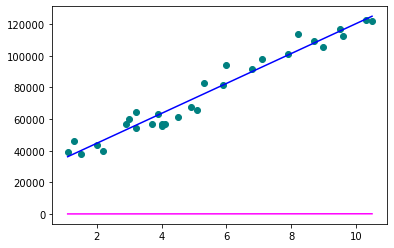

In [7]:
plt.scatter(X,Y,color='teal')
plt.plot(X,np.dot(Phi,theta),color='magenta')
m_np,b_np = np.polyfit(X,Y,1)
plt.plot(X,m_np*X+b_np,color='blue')
plt.show()